In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


We can see some null values

In [5]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


All the variables are categorical

### Missing values

In [6]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
len(train["Product_ID"].unique())

3631

In [8]:
np.sort(train["Product_Category_1"].unique()),len(train["Product_Category_1"].unique())

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20], dtype=int64),
 20)

In [9]:
np.sort(train["Occupation"].unique()),len(train["Occupation"].unique())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20], dtype=int64),
 21)

In [10]:
np.sort(train["Product_Category_3"].unique()),len(train["Product_Category_3"].unique())

(array([ 3.,  4.,  5.,  6.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,
        17., 18., nan]),
 16)

### We can do some imputations, here every product id has a unique Product categories, so I will fill the missing values with 0

In [11]:
train["Product_Category_2"].fillna(0,inplace = True)
train["Product_Category_3"].fillna(0,inplace = True)

In [12]:
train.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [13]:
test.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [14]:
test["Product_Category_2"].fillna(0,inplace = True)
test["Product_Category_3"].fillna(0,inplace = True)

In [15]:
train["source"] = "train"
test["source"] = "test"

In [16]:
data = pd.concat([train,test],ignore_index = True)

## Visualization

In [17]:
train.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,train


### Univariate

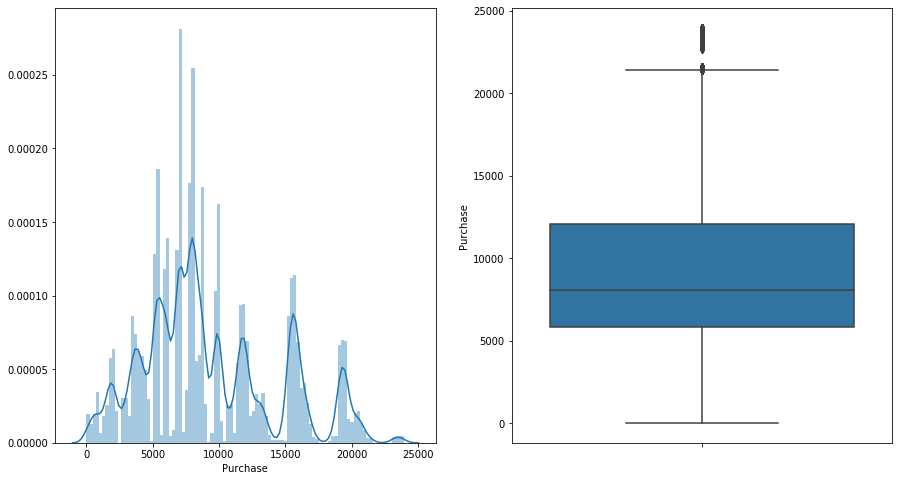

In [18]:
f, axes = plt.subplots(1,2,figsize = (15,8),squeeze = False)
sns.distplot(train["Purchase"],bins = 100,ax = axes[0][0])
sns.boxplot(train["Purchase"],orient='v',ax = axes[0][1])
plt.show()

### We can see some outliers

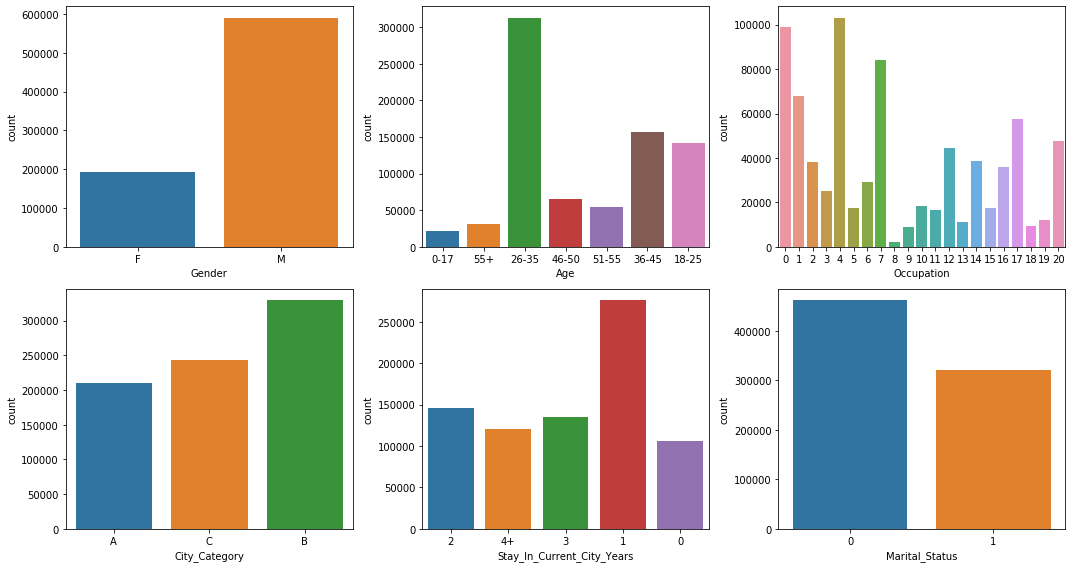

In [19]:
f, axes = plt.subplots(2,3,figsize = (15,8),tight_layout = True)
sns.countplot(x = "Gender",data = data,ax = axes[0][0])
sns.countplot(x = "Age",data = data,ax = axes[0][1])
sns.countplot(x = "Occupation",data = data,ax = axes[0][2])
sns.countplot(x = "City_Category",data = data,ax = axes[1][0])
sns.countplot(x = "Stay_In_Current_City_Years",data = data,ax = axes[1][1])
sns.countplot(x = "Marital_Status",data = data,ax = axes[1][2])
plt.show()

### Multivariate Analysis

In [20]:
Gender = train.groupby(["Gender"])["Purchase"].mean().reset_index(name = "Purchase")
Age = train.groupby(["Age"])["Purchase"].mean().reset_index(name = "Purchase")
Occupation = train.groupby(["Occupation"])["Purchase"].mean().reset_index(name = "Purchase")
City_Category = train.groupby(["City_Category"])["Purchase"].mean().reset_index(name = "Purchase")
Stay_In_Current_City_Years = train.groupby(["Stay_In_Current_City_Years"])["Purchase"].mean().reset_index(name = "Purchase")
Marital_Status = train.groupby(["Marital_Status"])["Purchase"].mean().reset_index(name = "Purchase")
#Product_ID = train.groupby(["Product_ID"])["Purchase"].mean().reset_index(name = "Purchase")

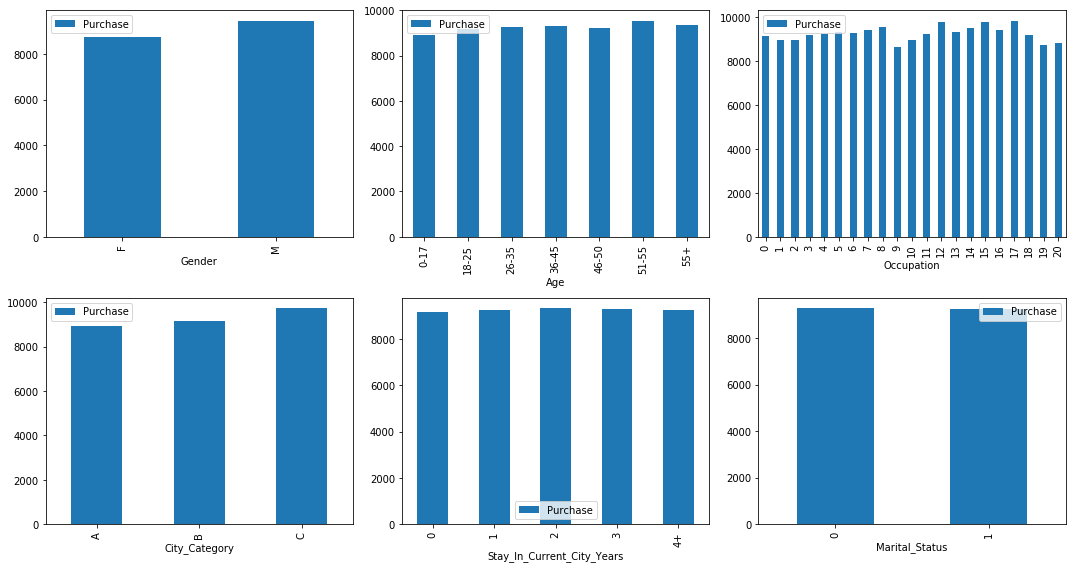

In [21]:
f, axes = plt.subplots(2,3,figsize = (15,8),tight_layout = True)
Gender.plot.bar(x = "Gender",y="Purchase",ax = axes[0][0])
Age.plot.bar(x = "Age",y="Purchase",ax = axes[0][1])
Occupation.plot.bar(x = "Occupation",y="Purchase",ax = axes[0][2])
City_Category.plot.bar(x = "City_Category",y="Purchase",ax = axes[1][0])
Stay_In_Current_City_Years.plot.bar(x = "Stay_In_Current_City_Years",y="Purchase",ax = axes[1][1])
Marital_Status.plot.bar(x = "Marital_Status",y="Purchase",ax = axes[1][2])
plt.show()

### Observation
1. There is not much to read from above bar plot because there are very minor differences.
2. City Category C has more purchases
3. Gender and Marital Status doesnt matter
4. Every age likes to purchase
5. Few Occupations have more purchases.

Lets check product category

In [22]:
Product_Category_1 = train.groupby(["Product_Category_1"])["Purchase"].mean().reset_index(name = "Purchase")
Product_Category_2 = train.groupby(["Product_Category_2"])["Purchase"].mean().reset_index(name = "Purchase")
Product_Category_3 = train.groupby(["Product_Category_3"])["Purchase"].mean().reset_index(name = "Purchase")

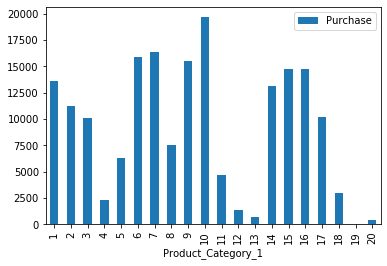

In [23]:
Product_Category_1.plot.bar(x = "Product_Category_1",y="Purchase")

### Category 10 has highest sale followed by 7,6 and 9

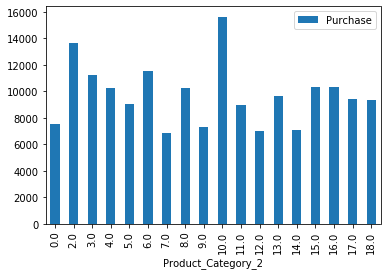

In [24]:
Product_Category_2.plot.bar(x = "Product_Category_2",y="Purchase")

### Category 10 has highest sale followed by 2 and 6

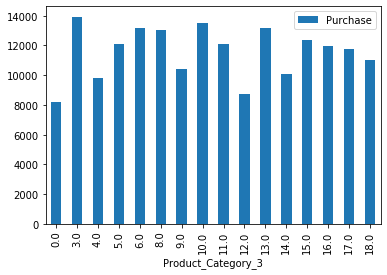

In [25]:
Product_Category_3.plot.bar(x = "Product_Category_3",y="Purchase")

### Category 4 has highest sale followed by 10 and 6

# Handling Categorical Variables

In [26]:
# Change the data type of all categorical variables
data["Gender"] = data["Gender"].astype("category")
data["Age"] = data["Age"].astype("category")
data["Occupation"] = data["Occupation"].astype("category")
data["City_Category"] = data["City_Category"].astype("category")
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].astype("category")
data["Marital_Status"] = data["Marital_Status"].astype("category")
data["Product_Category_1"] = data["Product_Category_1"].astype("category")
data["Product_Category_2"] = data["Product_Category_2"].astype("int")
data["Product_Category_3"] = data["Product_Category_3"].astype("int")
data["Product_Category_2"] = data["Product_Category_2"].astype("category")
data["Product_Category_3"] = data["Product_Category_3"].astype("category")

### Label Encoding of Gender

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])

### Hot Coding

In [29]:
cat_var = ["Age","Occupation","City_Category","Stay_In_Current_City_Years","Product_Category_1","Product_Category_2","Product_Category_3"]

In [30]:
data = pd.get_dummies(data,columns = cat_var)

In [31]:
data.shape

(783667, 96)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 96 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   User_ID                        783667 non-null  int64   
 1   Product_ID                     783667 non-null  object  
 2   Gender                         783667 non-null  int32   
 3   Marital_Status                 783667 non-null  category
 4   Purchase                       550068 non-null  float64 
 5   source                         783667 non-null  object  
 6   Age_0-17                       783667 non-null  uint8   
 7   Age_18-25                      783667 non-null  uint8   
 8   Age_26-35                      783667 non-null  uint8   
 9   Age_36-45                      783667 non-null  uint8   
 10  Age_46-50                      783667 non-null  uint8   
 11  Age_51-55                      783667 non-null  uint8   
 12  Age_55+         

In [33]:
cor =data.corr()

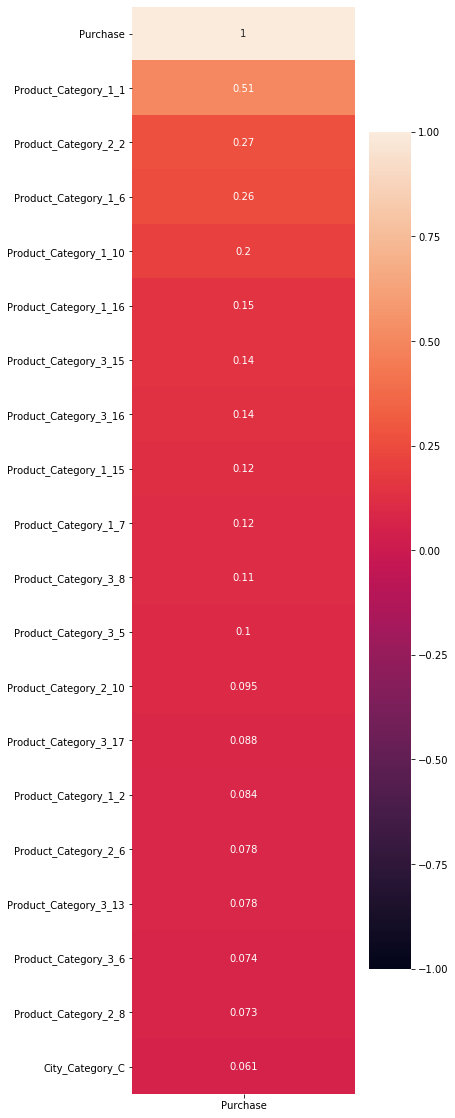

In [34]:
plt.figure(figsize = (5,20))
sns.heatmap(cor[["Purchase"]].sort_values(by = "Purchase", ascending = False).head(20),vmin = -1, annot = True)
plt.show()

# Feature Selection 
There are total 95 variables, so we need feature selection

In [35]:
from sklearn.feature_selection import SelectKBest,f_regression

In [36]:
train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"]

In [37]:
train.drop(["source"],axis = 1, inplace = True)
test.drop(["source","Purchase"],axis=1, inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
IDcol = ["User_ID","Product_ID"]
target = "Purchase"
features = [x for x in train.columns if x not in [target]+IDcol]

In [39]:
X = train[features].values
y = train[target]

In [40]:
selectB = SelectKBest(score_func = f_regression,k=65)

In [41]:
K_B = selectB.fit_transform(X,y)

In [42]:
cols = selectB.get_support(indices=True)

In [43]:
cols

array([ 0,  2,  7,  9, 10, 11, 16, 18, 21, 23, 24, 26, 28, 29, 30, 31, 32,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55,
       56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 76,
       77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91],
      dtype=int64)

In [44]:
selected_cols = train[features].columns[cols].tolist() # we have selected best features

In [45]:
# we created new arrays with selected best variables
X_final = train[selected_cols].values
y_final = train[target]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Split the original data to hold out 10% data for testing the performance of the best selected model
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size = 0.3,random_state = 1234)

In [48]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((385047, 65), (165021, 65), (385047,), (165021,))

In [49]:
#importing liraries for algorithms and metrics
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression

### Multiple Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train) # train the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
#predict the data
y_hat_linear = lm.predict(X_test) 

In [52]:
#calculate the RMSE
lr_rmse = math.sqrt(mean_squared_error(y_test, y_hat_linear))

In [53]:
lr_rmse

2982.458672151582

### Predict the test data

In [54]:
lm.fit(X_final,y_final)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
test["Purchase"] = lm.predict(test[selected_cols])

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
test.head()

,User_ID,Product_ID,Gender,Marital_Status,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Product_Category_3_10,Product_Category_3_11,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18,Purchase
550068,1000004,P00128942,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,13288.851562
550069,1000009,P00113442,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,11396.367188
550070,1000010,P00288442,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5855.421875
550071,1000010,P00145342,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1922.484375
550072,1000011,P00053842,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,2524.726562


In [57]:
submission = test[["Purchase","User_ID","Product_ID"]]

In [58]:
submission.to_csv("submission.csv",index = False)